# Your Title Here

**Name(s)**: (your name(s) here)

**Website Link**: (your website link)

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

#from dsc80_utils import * # Feel free to uncomment and use this.

interactions_fp = Path("food_data") /"RAW_interactions.csv"
interactions_raw = pd.read_csv(interactions_fp)

recipes_fp = Path("food_data") / "RAW_recipes.csv"
recipes_raw = pd.read_csv(recipes_fp)


## Step 1: Introduction

We chose to analyze the recipes and ratings dataframe. We will investigate the relationship between number of steps in a recipe and the recipe rating. This is an interesting question because it gives us insight into wether there is a relationship between the number of steps a user must go through in order to make a recipe, and their overall rating of the food. If there is a relationship, it would be interesting to understand what might underlie the differences in ratings. 

In [44]:
#merge datasets 

recipe_interactions = recipes_raw.merge(interactions_raw, left_on='id', right_on= "recipe_id", how = 'left').drop(columns = {'recipe_id'})
data_types = pd.DataFrame(recipe_interactions.dtypes)

#We replaced ratings of 0 with np.nan, since ratings are made on a 1-5 scale. Therefore, if a rating is 0, it means that the rating is missing,
#and should be excluded from the dataset in order to not bias calculations done on the ratings column. 
recipe_interactions['rating']= recipe_interactions['rating'].replace(0.0, np.nan)

#add a column with mean ratings 
recipe_interactions['avg_rating'] = recipe_interactions.groupby('id')['rating'].transform('mean')

#date submitted to datetime
recipe_interactions['submitted']= pd.to_datetime(recipe_interactions['submitted'])

#date created to datetime
recipe_interactions['date']= pd.to_datetime(recipe_interactions['date'])

In [25]:
data_types

,0
name,object
id,int64
minutes,int64
contributor_id,int64
submitted,object
tags,object
nutrition,object
n_steps,int64
steps,object
description,object


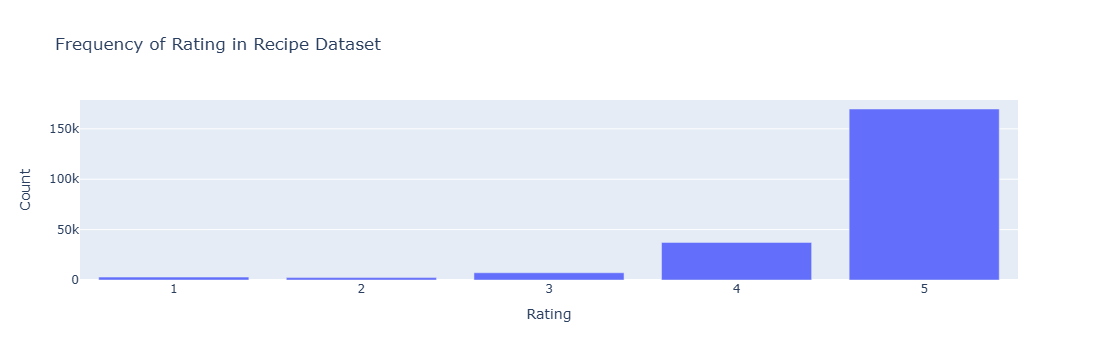

In [50]:
#Univariate Analysis: distribution of ratings

frequency = recipe_interactions['rating'].value_counts().reset_index()
frequency.columns = ['rating', 'Frequency']

fig = px.bar(frequency, x='rating', y='Frequency', 
             title='Frequency of Rating in Recipe Dataset',
             labels={'rating': 'Rating', 'Frequency': 'Count'})

fig.show()

## Step 2: Data Cleaning and Exploratory Data Analysis

In [ ]:
# TODO

## Step 3: Assessment of Missingness

In [ ]:
# TODO

## Step 4: Hypothesis Testing

In [ ]:
# TODO

## Step 5: Framing a Prediction Problem

In [ ]:
# TODO

## Step 6: Baseline Model

In [ ]:
# TODO

## Step 7: Final Model

In [ ]:
# TODO

## Step 8: Fairness Analysis

In [ ]:
# TODO